<a href="https://www.kaggle.com/code/wabass/video-game-sales-explore-analysis-and-visual?scriptVersionId=163523287" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


## **<span style="color:#1ec918">INTRODUCTION</span>**

Welcome to my Video Game Sales Analysis Portfolio Project! In this project, I delve into the dynamic and ever-evolving world of video game sales, utilizing data analysis techniques to extract valuable insights. Video games, as a form of entertainment, have grown into a multi-billion dollar industry, shaping trends, preferences, and market dynamics.


<h4 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px">Objective:</h4>

The primary objective of this portfolio project is to analyze historical video game sales data, exploring patterns, identifying successful genres, platforms, and publishers, and deriving meaningful conclusions to inform strategic decision-making within the gaming industry.


<h4 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px">Data Sources:</h4>

I have gathered comprehensive data from various sources, including reputable gaming databases, industry reports, and public datasets. This dataset spans multiple years and encompasses a wide range of variables, such as game title, platform, genre, publisher, sales figures, and critical reception.


<h4 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px">Key Components:</h4>

Exploratory Data Analysis (EDA): Uncover the characteristics of the dataset, identify outliers, missing values, and trends. Understand the distribution of sales across different platforms, genres, and regions.

Time Series Analysis: Examine the evolution of video game sales over time. Identify any seasonal patterns, industry shifts, and the impact of technological advancements on sales figures.

Genre and Platform Analysis: Determine the most popular gaming genres and platforms, exploring how these preferences have changed over the years. Investigate the correlation between critical acclaim and commercial success for different genres.

Top Publishers and Franchises: Analyze the contribution of major publishers to the industry. Identify the most successful video game franchises and assess the factors contributing to their sustained popularity.

Regional Market Analysis: Explore variations in video game sales across different regions. Understand cultural influences and market preferences, and analyze how they impact the success of games in various parts of the world.



<h4 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px">Tools Used:</h4>

I employed industry-standard tools such as **<span style="color:#71369e">Python </span>** for data wrangling and analysis, along with libraries like Pandas, NumPy, and Matplotlib for visualization. The interactive nature of Jupyter Notebooks has been utilized to enhance the clarity and reproducibility of the analysis.




Let's start by loading the libraries we would need for processing and visualizing the data.

In [2]:
# Importing Libraries 

import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the dataset 

data = pd.read_csv('../input/videogamesales/vgsales.csv')

Let's explore our data by viewing some statistical information about them.

We'll start by pulling the first 5 rows of the dataset.

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Lets view more info about the dataset.

In [4]:
data.info

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

Lets view the data Description.


In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<h3 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px">Genre with the Most Released Games:</h3>

In [6]:
data['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

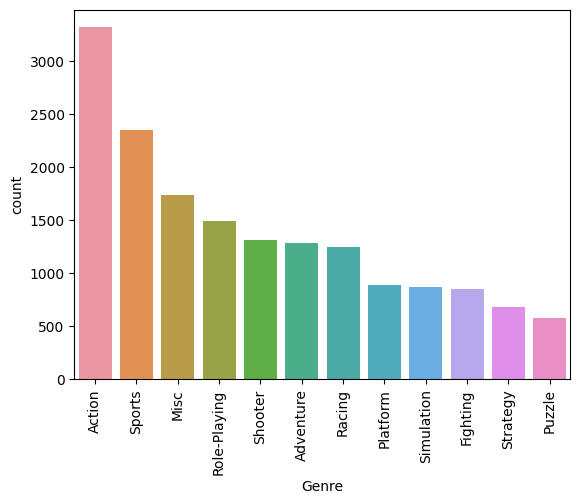

In [7]:
sns.countplot(x='Genre',data=data,order=data['Genre'].value_counts().index)
plt.xticks(rotation=90); 



From the above we can see that the **<span style="color:#71369e"> Action </span>**  genre tops as the realeased  while **<span style="color:#71369e">Puzzles </span>** are at the bottom of the table.

Now let see which  **<span style="color:#71369e">year </span>** that had the highest sales worldwide?

<h3 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px">Analyzing the most popular gaming platforms and genres:</h3>

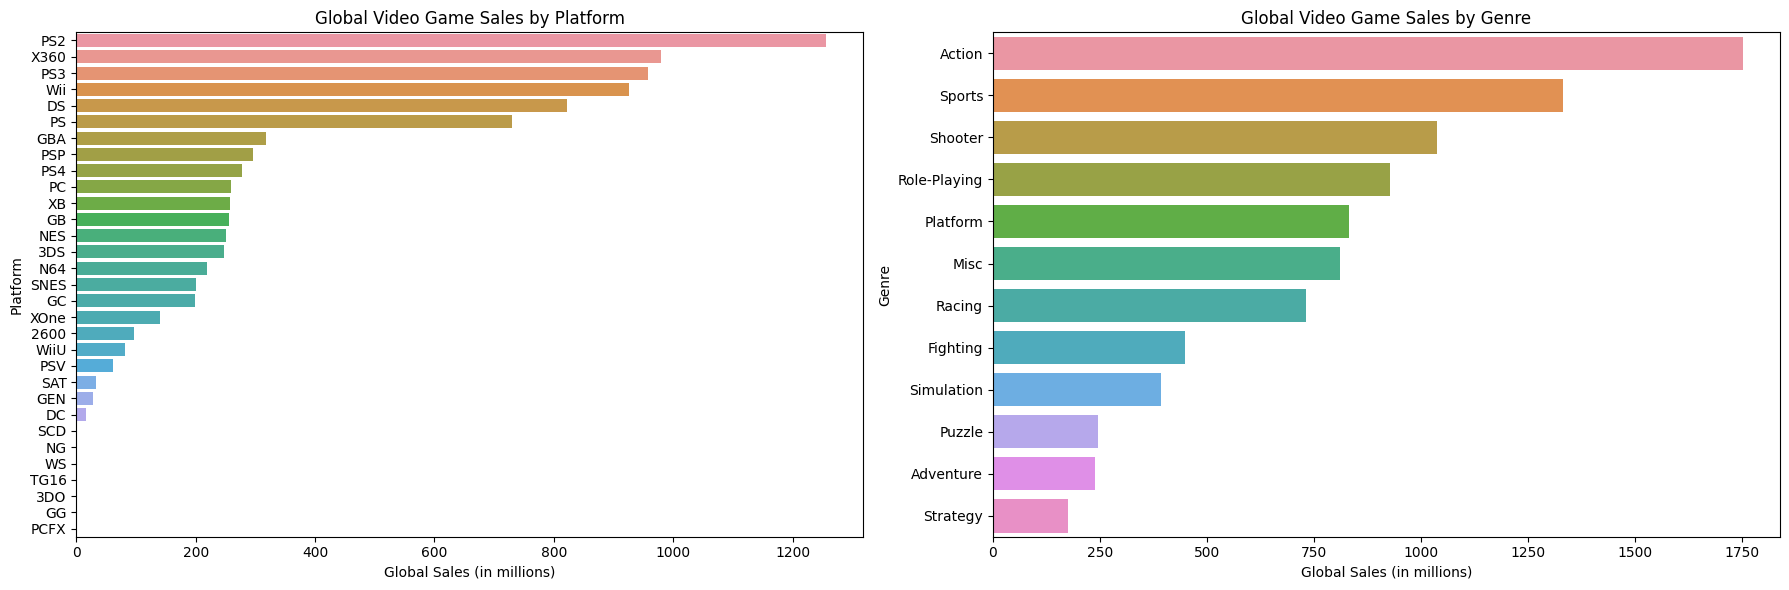

In [8]:

# Grouping the data by platform and summing up the global sales
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Grouping the data by genre and summing up the global sales
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Creating subplots for platforms and genres
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the sales by platform
sns.barplot(x=platform_sales.values, y=platform_sales.index, ax=ax[0])
ax[0].set_title('Global Video Game Sales by Platform')
ax[0].set_xlabel('Global Sales (in millions)')
ax[0].set_ylabel('Platform')

# Plotting the sales by genre
sns.barplot(x=genre_sales.values, y=genre_sales.index, ax=ax[1])
ax[1].set_title('Global Video Game Sales by Genre')
ax[1].set_xlabel('Global Sales (in millions)')
ax[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()

The two bar charts above provide insights into the most popular gaming platforms and genres in terms of global sales:

1. **<span style="color:#1ec918">Popular Platforms:</span>**

* The left chart shows the global video game sales aggregated by platform.
* Certain platforms stand out as having significantly higher sales. These are likely platforms that had a large market share or a long period of popularity.

2. **<span style="color:#1ec918">Popular Genres:</span>**

* The right chart displays the global video game sales aggregated by genre.
* Some genres are evidently more popular than others, which could be due to broader appeal, a larger number of releases in those genres, or a combination of both.

<h3 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px"> Video game publisher with the most global sales:</h3>

Text(0, 0.5, 'Global Sales($)')

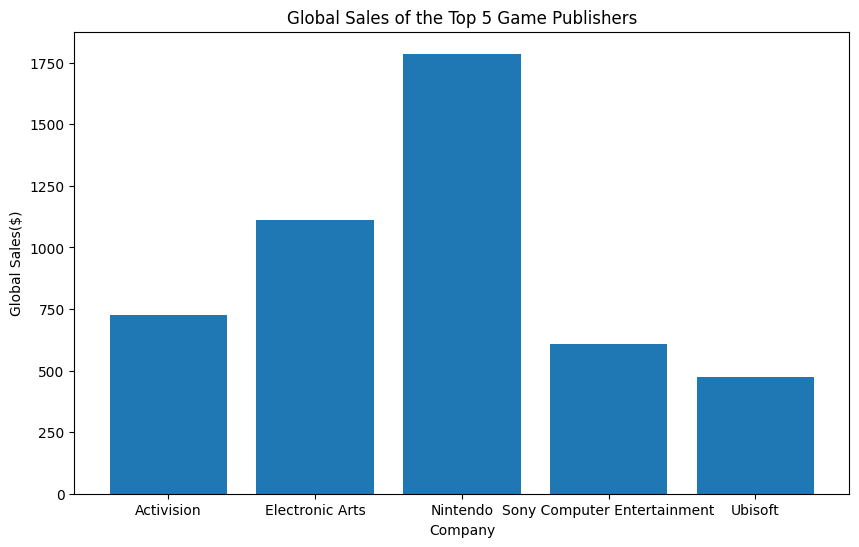

In [9]:


# Selecting the Top 5 companies from the previous query
selected_companies = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft']
selected_data = data[data['Publisher'].isin(selected_companies)]

# Group by company and calculate the sum of Global_Sales
sum_global_sales = selected_data.groupby('Publisher')['Global_Sales'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(sum_global_sales.index, sum_global_sales.values)
plt.title('Global Sales of the Top 5 Game Publishers')
plt.xlabel('Company')
plt.ylabel('Global Sales($)')

<h3 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px"> Regional Sales Comparison:</h3>

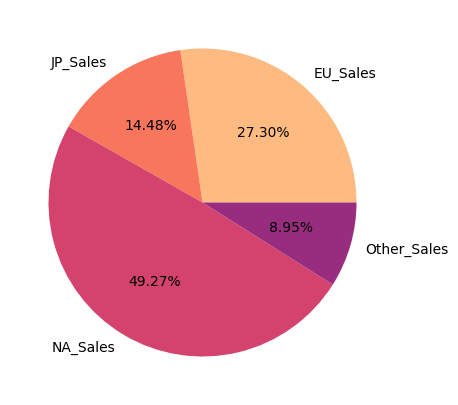

In [10]:
#Creating a new Data Frame that includes all the regional sales
area_sales = data[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
area_sales = area_sales.melt(var_name='Area',value_name='Total_Sales')
area_sales = area_sales.groupby('Area')['Total_Sales'].sum().reset_index()
# area_sales.head()

#Plotting a graph from the above information
plt.figure(figsize=(10,5))
plt.pie(area_sales['Total_Sales'],labels=area_sales['Area'],colors=sns.color_palette('magma_r'),autopct='%.2f%%')
plt.show()

<h3 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px"> Correlation Matrix and Scatter Plots</h3>

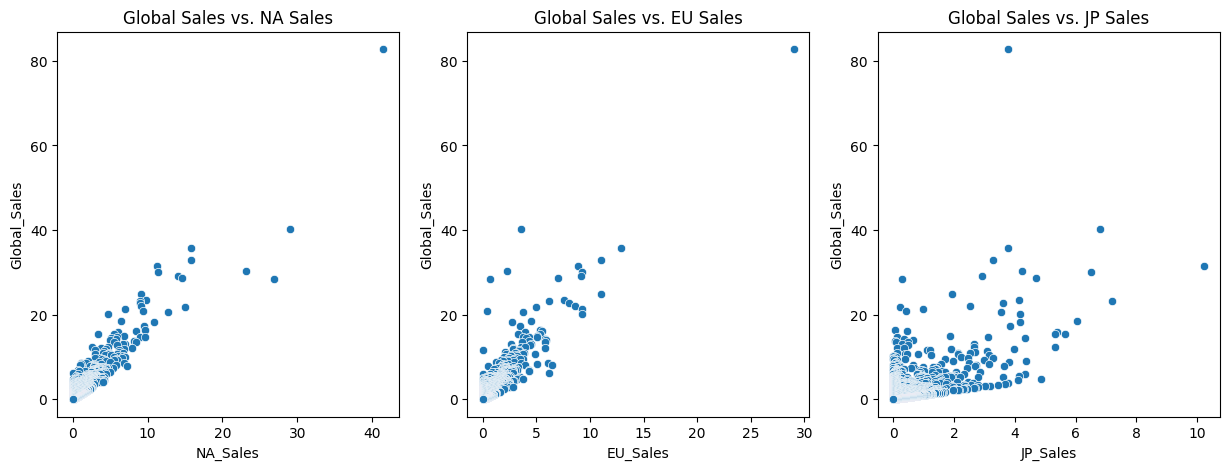

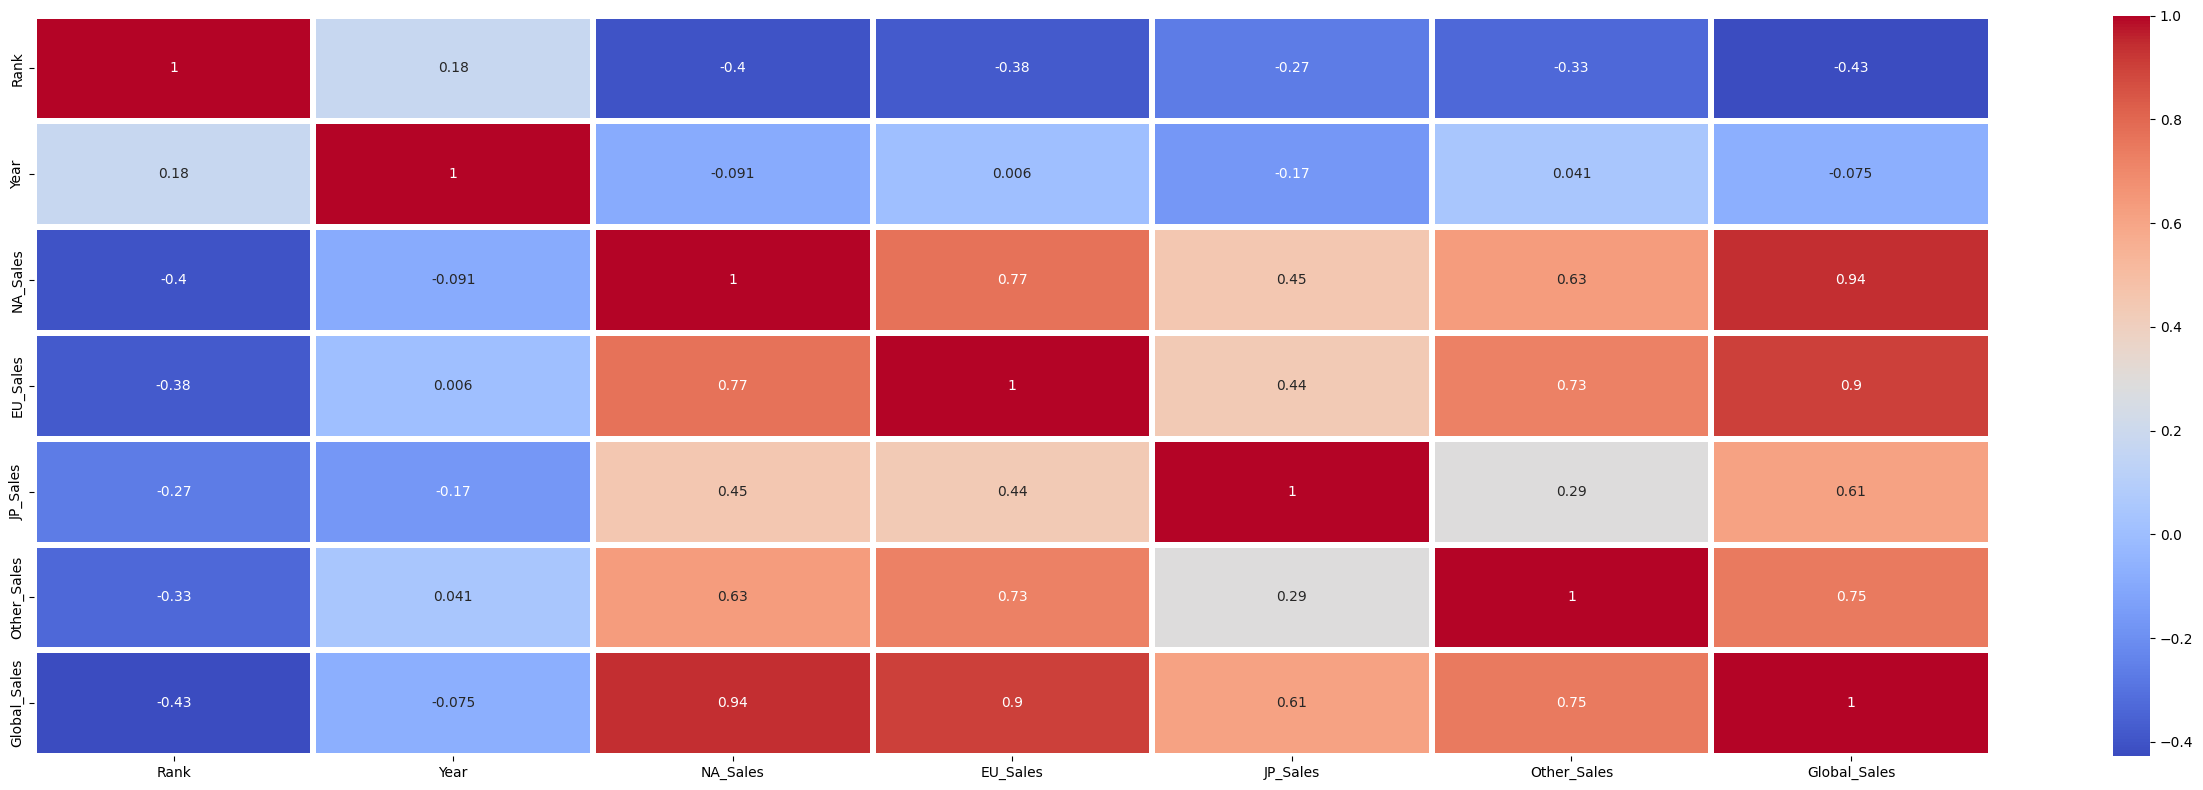

In [11]:
# Scatter plot for Global Sales vs. NA Sales, EU Sales, JP Sales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=data)
plt.title('Global Sales vs. NA Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='EU_Sales', y='Global_Sales', data=data)
plt.title('Global Sales vs. EU Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='JP_Sales', y='Global_Sales', data=data)
plt.title('Global Sales vs. JP Sales')

plt.figure(figsize=(25,8))
sns.heatmap(data.corr('pearson',numeric_only=True),cmap='coolwarm',annot=True,linewidth=4)

plt.tight_layout()
plt.show()

<h3 style="background-color:#1ec918;color:white;border-radius: 8px; padding:12px"> 📊 Insights on Video Game Sales Data</h3>


## **<span style="color:#853f3a">🌐 Global Sales vs. Other Regions:</span>**

Global sales exhibit a robust inverse relationship with North American (NA) and European (EU) sales, revealing that as one region experiences a sales uptick, global sales tend to decline. Conversely, the correlation with Japanese (JP) sales is less pronounced, hinting at a more intricate dynamic. 

## **<span style="color:#853f3a">⌛ Yearly Sales Trends:</span>**

The connection between the year of release and global sales demonstrates a relatively feeble positive correlation, suggesting that the release year may not significantly impact overall sales patterns. 

## **<span style="color:#853f3a">🌐 Regional Sales Dynamics:</span>**

Significantly, substantial positive correlations emerge between NA and EU sales, as well as NA and JP sales, indicating analogous preferences in these regions. Additionally, EU and JP sales display a positive correlation, indicating shared gaming interests. 

## **<span style="color:#853f3a">🛒 Other Sales Contributions:</span>**

The positive correlations between global sales and sales in other regions underscore the importance of diverse market contributions to overall game sales. 

## **<span style="color:#853f3a">📊 General Implications:</span>**

To enhance global sales performance, it is imperative to comprehend and tailor marketing strategies according to specific regional preferences. The intricate interplay among regions necessitates a nuanced approach for successful game launches.